In [ ]:
from sklearn.neighbors import KNeighborsClassifier

x = [
    [0,1],
    [1,5],
    [2,4],
    [3,6]
    ]

y = [0,0,1,1]

test_x = [[1,7],[0,2]]
knn = KNeighborsClassifier(n_neighbors=3,p=1)

knn.fit(x, y)

y_pred = knn.predict(test_x)

print(y_pred)

[1 0]


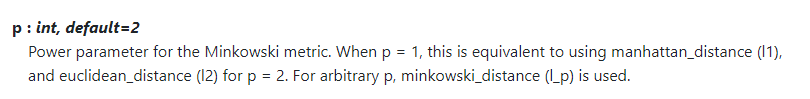

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

x = [
    [0,1],
    [1,5],
    [2,4],
    [3,6]
    ]

y = [0,0,1,1]

test_x = [[0,1],[2,4]]
knn = KNeighborsClassifier(n_neighbors=1,p=2)

knn.fit(x, y)

y_pred = knn.predict(test_x)

print(y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

x = [
    [0,2],
    [0,0],
    ]

y = [0,1]

test_x = [[0,1]]
knn = KNeighborsClassifier(n_neighbors=1,p=2)

knn.fit(x, y)

y_pred = knn.predict(test_x)

print(y_pred)

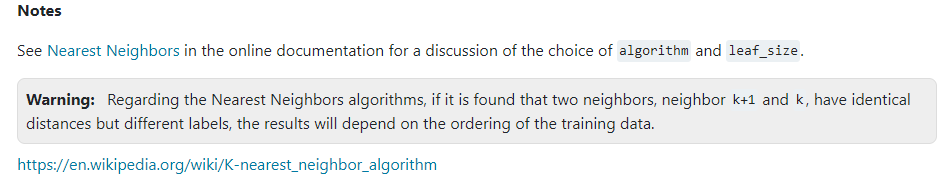

# **Using KNN on a Dataset**

# **Raw Data**

In [89]:
import pandas as pd

df = pd.read_csv('/content/Waveform Database Generator.csv',header = None)#https://archive.ics.uci.edu/dataset/43/haberman+s+survival
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.65,0.69,2.29,-0.16,0.51,0.26,2.34,-0.42,0.49,0.31,...,3.46,4.81,5.49,5.19,3.10,3.86,2.96,1.09,-1.42,0
4996,-0.02,0.67,2.34,3.18,2.16,4.77,6.70,4.54,4.92,3.39,...,1.53,2.52,1.14,-1.56,-1.18,-0.56,0.02,-1.05,-0.18,1
4997,0.01,-1.99,0.16,2.30,-0.53,1.93,3.61,3.00,4.61,5.73,...,3.14,3.04,1.61,0.60,-0.52,0.62,1.00,1.21,-0.27,1
4998,-0.40,0.41,-0.48,1.04,0.79,-0.66,1.18,0.52,2.20,0.59,...,3.64,3.62,5.97,2.63,3.83,1.72,2.08,1.31,1.37,0


In [90]:
cols = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','target']
df.columns = cols
df

,a,b,c,d,e,f,g,h,i,j,...,m,n,o,p,q,r,s,t,u,target
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.65,0.69,2.29,-0.16,0.51,0.26,2.34,-0.42,0.49,0.31,...,3.46,4.81,5.49,5.19,3.10,3.86,2.96,1.09,-1.42,0
4996,-0.02,0.67,2.34,3.18,2.16,4.77,6.70,4.54,4.92,3.39,...,1.53,2.52,1.14,-1.56,-1.18,-0.56,0.02,-1.05,-0.18,1
4997,0.01,-1.99,0.16,2.30,-0.53,1.93,3.61,3.00,4.61,5.73,...,3.14,3.04,1.61,0.60,-0.52,0.62,1.00,1.21,-0.27,1
4998,-0.40,0.41,-0.48,1.04,0.79,-0.66,1.18,0.52,2.20,0.59,...,3.64,3.62,5.97,2.63,3.83,1.72,2.08,1.31,1.37,0


In [91]:
df.isnull().sum()

a         0
b         0
c         0
d         0
e         0
f         0
g         0
h         0
i         0
j         0
k         0
l         0
m         0
n         0
o         0
p         0
q         0
r         0
s         0
t         0
u         0
target    0
dtype: int64

In [92]:
df = df.iloc[:,-4:]

df

,s,t,u,target
0,1.20,0.24,-0.56,2
1,1.78,0.60,2.42,1
2,-0.01,-0.79,-0.12,0
3,2.84,-1.18,1.12,1
4,-0.21,-0.80,-0.68,1
...,...,...,...,...
4995,2.96,1.09,-1.42,0
4996,0.02,-1.05,-0.18,1
4997,1.00,1.21,-0.27,1
4998,2.08,1.31,1.37,0


In [93]:
x = df.drop('target',axis = 1)
y = df['target']

In [94]:
print(x)
print(y)
x.describe()

         s     t     u
0     1.20  0.24 -0.56
1     1.78  0.60  2.42
2    -0.01 -0.79 -0.12
3     2.84 -1.18  1.12
4    -0.21 -0.80 -0.68
...    ...   ...   ...
4995  2.96  1.09 -1.42
4996  0.02 -1.05 -0.18
4997  1.00  1.21 -0.27
4998  2.08  1.31  1.37
4999  0.09  0.01  0.60

[5000 rows x 3 columns]
0       2
1       1
2       0
3       1
4       1
       ..
4995    0
4996    1
4997    1
4998    0
4999    1
Name: target, Length: 5000, dtype: int64


,s,t,u
count,5000.000000,5000.000000,5000.000000
mean,0.661482,0.357300,-0.021378
std,1.197326,1.081337,0.997064
min,-3.500000,-3.570000,-3.880000
25%,-0.180000,-0.350000,-0.690000
50%,0.620000,0.350000,-0.030000
75%,1.470000,1.072500,0.660000
max,5.280000,4.650000,4.010000


In [96]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['s', 't','u']
scaler = MinMaxScaler()
x[columns_to_scale] = scaler.fit_transform(x[columns_to_scale])

# **Feature Selection**

In [97]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x.values,y.values,random_state = 42,test_size= 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 3)
(4000,)
(1000, 3)
(1000,)


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# **Model Training**

In [99]:
clf1 = KNeighborsClassifier(n_neighbors = 5,p=1)#manhattan
clf2 = KNeighborsClassifier(n_neighbors = 10,p=2)#euclidean

In [100]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

# **Model Evaluation**

In [101]:
pred1 = clf1.predict(x_test)
pred2 = clf2.predict(x_test)

In [102]:
cm1 = confusion_matrix(y_test,pred1)
cm2 = confusion_matrix(y_test,pred2)

In [103]:
print(cm1)

[[139  91 103]
 [107 174  73]
 [148  70  95]]


In [104]:
print(cm2)

[[118 101 114]
 [ 81 194  79]
 [145  71  97]]


In [105]:
cl1 = classification_report(y_test,pred1)
cl2 = classification_report(y_test,pred2)

In [106]:
print(cl1)

              precision    recall  f1-score   support

           0       0.35      0.42      0.38       333
           1       0.52      0.49      0.51       354
           2       0.35      0.30      0.33       313

    accuracy                           0.41      1000
   macro avg       0.41      0.40      0.40      1000
weighted avg       0.41      0.41      0.41      1000



In [107]:
print(cl2)

              precision    recall  f1-score   support

           0       0.34      0.35      0.35       333
           1       0.53      0.55      0.54       354
           2       0.33      0.31      0.32       313

    accuracy                           0.41      1000
   macro avg       0.40      0.40      0.40      1000
weighted avg       0.41      0.41      0.41      1000



# **Now It's Your Turn**

https://archive.ics.uci.edu